/var/folders/94/rldh_67s1xd0qhyk3wl76_x40000gn/T/ipykernel_64155/4067672820.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_with_five_columns_female['year'] = new_data_with_five_columns_female['year'].astype(int)
/var/folders/94/rldh_67s1xd0qhyk3wl76_x40000gn/T/ipykernel_64155/4067672820.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_with_five_columns_female['quarter'] = new_data_with_five_columns_female['quarter'].str.extract('(\d)').astype(str)
/var/folders/94/rldh_67s1xd0qhyk

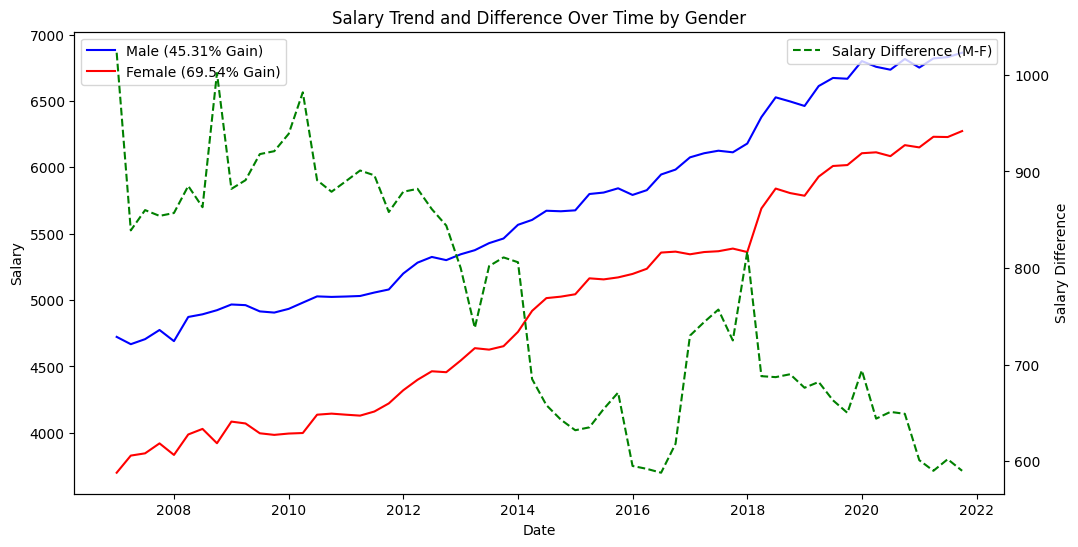

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/abdallahabdul-latif/Desktop/Universität Tübingen/5.Semester/Data Literacy/StudentProject/AnalysingStudentDevelopment/data/sallary_per_sector.csv'

data = pd.read_csv(file_path, encoding= "ISO-8859-1",sep=";", decimal=".", skiprows=5, skipfooter=9, index_col=0, engine="python")

# Get the list of columns in the DataFrame
columns_list = data.columns.tolist()

# Let's say you want to rename the column at index 2
columns_list[0] = 'sector'
columns_list[1] = 'year'
columns_list[2] = 'quarter'
columns_list[3] = 'salary'
columns_list[6] = 'salary'

# Assign the modified list of column names back to the DataFrame
data.columns = columns_list

# The value you're looking for
specific_value = 'Forschung und Entwicklung'

# Create a new DataFrame with only the rows where 'sector' column has the specific value
filtered_data = data[data['sector'] == specific_value].copy()

# Creating a new DataFrame with only the first five columns of the filtered_data DataFrame
new_data_with_five_columns = filtered_data.iloc[:, :7].copy()

new_data_with_five_columns_male = new_data_with_five_columns.iloc[:, :4].copy()
new_data_with_five_columns_female = new_data_with_five_columns.iloc[:, [0, 1, 2, -1]]

# Preprocess year column
new_data_with_five_columns_male['year'] = new_data_with_five_columns_male['year'].astype(int)
new_data_with_five_columns_female['year'] = new_data_with_five_columns_female['year'].astype(int)

# Preprocess the 'quarter' column to standard format
# Assuming the original format is something like '1. Quartal', '2. Quartal', etc.
new_data_with_five_columns_male['quarter'] = new_data_with_five_columns_male['quarter'].str.extract('(\d)').astype(str)
new_data_with_five_columns_female['quarter'] = new_data_with_five_columns_female['quarter'].str.extract('(\d)').astype(str)

# Now create the 'date' column
new_data_with_five_columns_male['date'] = pd.to_datetime(new_data_with_five_columns_male['year'].astype(str) + 'Q' + new_data_with_five_columns_male['quarter'])
new_data_with_five_columns_female['date'] = pd.to_datetime(new_data_with_five_columns_female['year'].astype(str) + 'Q' + new_data_with_five_columns_female['quarter'])

# Reset the index of the DataFrame
new_data_with_five_columns_male.reset_index(drop=True, inplace=True)
new_data_with_five_columns_female.reset_index(drop=True, inplace=True)

# Assuming your DataFrame is named 'new_data_with_five_columns'
# Ensure 'date' is a datetime and 'salary' is numeric
new_data_with_five_columns_male['date'] = pd.to_datetime(new_data_with_five_columns_male['date'], errors='coerce')
new_data_with_five_columns_male['salary'] = pd.to_numeric(new_data_with_five_columns_male['salary'], errors='coerce')

new_data_with_five_columns_female['date'] = pd.to_datetime(new_data_with_five_columns_female['date'], errors='coerce')
new_data_with_five_columns_female['salary'] = pd.to_numeric(new_data_with_five_columns_female['salary'], errors='coerce')

# Drop rows where 'date' or 'salary' is NaN
new_data_with_five_columns_male.dropna(subset=['date', 'salary'], inplace=True)
new_data_with_five_columns_female.dropna(subset=['date', 'salary'], inplace=True)

# Extract the 'date' and 'salary' columns as NumPy arrays
dates_male = new_data_with_five_columns_male['date'].to_numpy()
salaries_male = new_data_with_five_columns_male['salary'].to_numpy()

dates_female = new_data_with_five_columns_female['date'].to_numpy()
salaries_female = new_data_with_five_columns_female['salary'].to_numpy()

"""
# Plotting salary trends for both male and female
fig, ax = plt.subplots(figsize=(12, 6))

# Male salary trend
ax.plot(dates_male, salaries_male, color='blue', label='Male')

# Female salary trend
ax.plot(dates_male, salaries_female, color='red', label='Female')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Salary')
ax.set_title('Salary Trend Over Time by Gender')
plt.xticks(rotation=45)
plt.legend()

plt.show()
"""

# Assuming 'salaries' is the array for male salaries and 'female_salaries' for female salaries
# Ensure both arrays have the same length and correspond to 'dates'

# Calculate the percentage gain for male
if salaries_male.size > 0:
    male_percentage_gain = ((salaries_male[-1] - salaries_male[0]) / salaries_male[0]) * 100
else:
    male_percentage_gain = 0

# Calculate the percentage gain for female
if salaries_female.size > 0:
    female_percentage_gain = ((salaries_female[-1] - salaries_female[0]) / salaries_female[0]) * 100
else:
    female_percentage_gain = 0


"""
# Plotting salary trends for both male and female
fig, ax = plt.subplots(figsize=(12, 6))

# Male salary trend
ax.plot(dates_male, salaries_male, color='blue', label=f'Male ({male_percentage_gain:.2f}% Gain)')

# Female salary trend
ax.plot(dates, salaries_female, color='red', label=f'Female ({female_percentage_gain:.2f}% Gain)')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Salary')
ax.set_title('Salary Trend Over Time by Gender')
plt.xticks(rotation=45)
plt.legend()
"""

# Calculate the salary difference (male - female)
salary_difference = salaries_male - salaries_female

# Plotting salary trends and salary difference
fig, ax1 = plt.subplots(figsize=(12, 6))

# Male and Female salary trends on primary y-axis
ax1.plot(dates_male, salaries_male, color='blue', label=f'Male ({male_percentage_gain:.2f}% Gain)')
ax1.plot(dates_male, salaries_female, color='red', label=f'Female ({female_percentage_gain:.2f}% Gain)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salary')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Salary difference on secondary y-axis
ax2 = ax1.twinx()  
ax2.plot(dates_male, salary_difference, color='green', label='Salary Difference (M-F)', linestyle='--')
ax2.set_ylabel('Salary Difference')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Salary Trend and Difference Over Time by Gender')
plt.xticks(rotation=45)
plt.show()




                            sector  year     quarter salary
WZ08-72  Forschung und Entwicklung  2007  1. Quartal   4723
WZ08-72  Forschung und Entwicklung  2007  2. Quartal   4668
                            sector  year quarter salary       date
WZ08-72  Forschung und Entwicklung  2007       1   4723 2007-01-01
WZ08-72  Forschung und Entwicklung  2007       2   4668 2007-04-01


/var/folders/94/rldh_67s1xd0qhyk3wl76_x40000gn/T/ipykernel_42303/1783322110.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data_with_five_columns['date'] = pd.to_datetime(new_data_with_five_columns['year'].astype(str) + 'Q' + new_data_with_five_columns['quarter'])


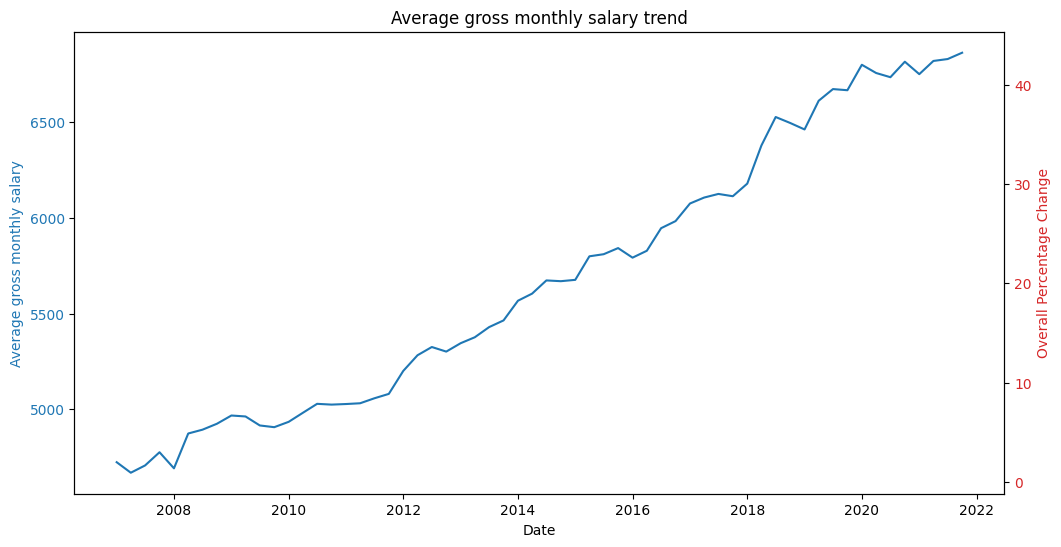

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/abdallahabdul-latif/Desktop/Universität Tübingen/5.Semester/Data Literacy/StudentProject/AnalysingStudentDevelopment/data/sallary_per_sector.csv'

data = pd.read_csv(file_path, encoding= "ISO-8859-1",sep=";", decimal=".", skiprows=5, skipfooter=9, index_col=0, engine="python")

# Get the list of columns in the DataFrame
columns_list = data.columns.tolist()

# Let's say you want to rename the column at index 2
columns_list[0] = 'sector'
columns_list[1] = 'year'
columns_list[2] = 'quarter'
columns_list[3] = 'salary'

# Assign the modified list of column names back to the DataFrame
data.columns = columns_list

# The value you're looking for
specific_value = 'Forschung und Entwicklung'

# Create a new DataFrame with only the rows where 'sector' column has the specific value
filtered_data = data[data['sector'] == specific_value].copy()

# Creating a new DataFrame with only the first five columns of the filtered_data DataFrame
new_data_with_five_columns = filtered_data.iloc[:, :4].copy()

new_data_with_five_columns['year'] = new_data_with_five_columns['year'].astype(int)

# Preprocess the 'quarter' column to standard format
# Assuming the original format is something like '1. Quartal', '2. Quartal', etc.
new_data_with_five_columns['quarter'] = new_data_with_five_columns['quarter'].str.extract('(\d)').astype(str)

# Now create the 'date' column
new_data_with_five_columns['date'] = pd.to_datetime(new_data_with_five_columns['year'].astype(str) + 'Q' + new_data_with_five_columns['quarter'])


print(new_data_with_five_columns[:2])

# Reset the index of the DataFrame
new_data_with_five_columns.reset_index(drop=True, inplace=True)

# Assuming your DataFrame is named 'new_data_with_five_columns'
# Ensure 'date' is a datetime and 'salary' is numeric
new_data_with_five_columns['date'] = pd.to_datetime(new_data_with_five_columns['date'], errors='coerce')
new_data_with_five_columns['salary'] = pd.to_numeric(new_data_with_five_columns['salary'], errors='coerce')

# Drop rows where 'date' or 'salary' is NaN
new_data_with_five_columns.dropna(subset=['date', 'salary'], inplace=True)

# Extract the 'date' and 'salary' columns as NumPy arrays
dates = new_data_with_five_columns['date'].to_numpy()
salaries = new_data_with_five_columns['salary'].to_numpy()

"""
# Basic line plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(dates, salaries, marker='o')  # Using 'o' as a marker for each data point

plt.title('Salary Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

"""

# Assuming 'salaries' and 'dates' are your NumPy arrays
# Calculate percentage change from the first salary value
percentage_changes = ((salaries - salaries[0]) / salaries[0]) * 100

# Plotting salary trend
fig, ax1 = plt.subplots(figsize=(12, 6))

# Salary trend on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average gross monthly salary', color=color)
ax1.plot(dates, salaries, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Percentage change on secondary y-axis (scale set, but no additional plot line)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Overall Percentage Change', color=color)
ax2.set_ylim([percentage_changes.min(), percentage_changes.max()])
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average gross monthly salary trend')
plt.xticks(rotation=45)
plt.show()






In [46]:
import pandas as pd

file_path = '/Users/abdallahabdul-latif/Desktop/Universität Tübingen/5.Semester/Data Literacy/StudentProject/AnalysingStudentDevelopment/data/sallary_per_sector.csv'

data = pd.read_csv(file_path, encoding= "ISO-8859-1",sep=";", decimal=".", skiprows=5, skipfooter=9, index_col=[0, 1], engine="python")
data.head()
#print(data[:5])

"""
salary_values = data['Leistungsgruppe 1'].values
print(salary_values[:5])
"""

# Forschung und Entwicklung (Reseach and Development)
data_salary_male_RD = 
# Get the list of columns in the DataFrame
columns_list = data.columns.tolist()

# Let's say you want to rename the column at index 2
columns_list[0] = 'year'
columns_list[1] = 'quarter'
columns_list[2] = 'salary'

# Assign the modified list of column names back to the DataFrame
data.columns = columns_list

# Display the DataFrame to confirm the column name has been changed
print(data.head())



data['date'] = pd.to_datetime(data['year'].astype(str) + 'Q' + data['quarter'].astype(str))

# Group by sector and date and calculate the mean salary
salary_trends = data.groupby(['sector', 'date'])['salary'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 8))
sns.lineplot(data=salary_trends, x='date', y='salary', hue='sector')
plt.title('Salary Trends by Sector')
plt.xlabel('Date')
plt.ylabel('Average Salary')
plt.legend(title='Sector')
plt.show()





                                                             Unnamed: 2   
NaN       NaN                                                       NaN  \
          NaN                                                       NaN   
          NaN                                                       NaN   
WZ08-B-08 Produzierendes Gewerbe und Dienstleistungsbereich      2007.0   
          Produzierendes Gewerbe und Dienstleistungsbereich      2007.0   

                                                             Unnamed: 3   
NaN       NaN                                                       NaN  \
          NaN                                                       NaN   
          NaN                                                       NaN   
WZ08-B-08 Produzierendes Gewerbe und Dienstleistungsbereich  1. Quartal   
          Produzierendes Gewerbe und Dienstleistungsbereich  2. Quartal   

                                                                                    Leistungsgrupp